In [102]:
import glob, re
import pandas as pd
from astropy.table import Table 
import numpy as np
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import style
import seaborn as sns
%matplotlib inline 
import seaborn as sns

In [91]:
filesin=sorted(glob.glob('/Users/melinda/Dropbox/Research_NGC6791/Colman_Vartools/*.dat'))

In [92]:
df=pd.read_table(filesin[0], index_col=0, sep='=',header=None,skiprows=2).T
df.columns = df.columns.str.strip()
ID=filesin[0].split(".dat",1)[0]
ID=ID.split("Vartools/",1)[1]
df['KeplerID'] = ID
df

,Mean_Mag_1,RMS_1,Expected_RMS_1,Npoints_1,LS_Period_1_2,Log10_LS_Prob_1_2,LS_Periodogram_Value_1_2,LS_SNR_1_2,LS_Period_2_2,Log10_LS_Prob_2_2,LS_Periodogram_Value_2_2,LS_SNR_2_2,LS_Period_3_2,Log10_LS_Prob_3_2,LS_Periodogram_Value_3_2,LS_SNR_3_2,KeplerID
1,0.00001,0.00449,1.0,60658.0,0.323289,-0.40471,0.00036,10.78875,0.109654,-0.1758,0.00034,9.94314,0.237501,-0.03539,0.00031,9.04226,2297113


In [110]:
for i in range(1,100):
    f=filesin[i]
    ID=f.split(".dat",1)[0]
    ID=ID.split("Vartools/",1)[1]
    df2=pd.read_table(f, index_col=0, sep='=',header=None,skiprows=2).T
    df2.columns = df2.columns.str.strip()
    df2['KeplerID'] = ID
    df=df.append(df2,ignore_index=True)

/Users/melinda/py37/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [111]:
df=df.drop(columns=['Mean_Mag_1', 'Expected_RMS_1'])
df[0:10]

,KeplerID,LS_Period_1_2,LS_Period_2_2,LS_Period_3_2,LS_Periodogram_Value_1_2,LS_Periodogram_Value_2_2,LS_Periodogram_Value_3_2,LS_SNR_1_2,LS_SNR_2_2,LS_SNR_3_2,Log10_LS_Prob_1_2,Log10_LS_Prob_2_2,Log10_LS_Prob_3_2,Npoints_1,RMS_1
0,2297113,0.323289,0.109654,0.237501,0.00036,0.00034,0.00031,10.78875,9.94314,9.04226,-0.40471,-0.17580,-0.03539,60658.0,0.00449
1,2297125,0.153300,0.148289,0.701745,0.00037,0.00035,0.00034,10.97977,10.14708,10.03568,-0.52415,-0.26447,-0.23617,60601.0,0.00618
2,2297143,0.114972,0.787338,0.132185,0.00039,0.00035,0.00032,11.48980,10.17684,9.24560,-0.69765,-0.27025,-0.07333,60725.0,0.00627
3,2297168,0.138471,0.118728,0.271129,0.00037,0.00036,0.00033,10.73851,10.45384,9.52103,-0.53466,-0.43376,-0.17018,60739.0,0.00530
4,2297175,0.152016,0.107296,0.160084,0.00038,0.00034,0.00034,11.39406,9.81876,9.80829,-0.65133,-0.17464,-0.17062,60566.0,0.00364
5,2297206,0.135347,0.704353,1.663425,0.00033,0.00033,0.00029,9.27527,9.27281,8.21318,-0.11672,-0.11520,-0.00775,60330.0,0.00736
6,2297209,0.183217,2.985250,0.259294,0.00050,0.00043,0.00041,14.59172,12.28486,11.64410,-2.12311,-1.16735,-0.90743,60154.0,0.00201
7,2297257,0.248098,0.133828,0.128669,0.00032,0.00032,0.00031,9.12489,9.06849,9.00302,-0.07506,-0.06742,-0.05895,60711.0,0.00848
8,2297273,0.147924,0.380769,0.124935,0.00041,0.00038,0.00033,12.20127,11.34279,9.46887,-0.97489,-0.65426,-0.11313,60639.0,0.00422
9,2297297,1.021836,0.415087,0.112760,0.00034,0.00034,0.00034,10.05981,10.00704,9.87319,-0.22287,-0.20900,-0.17884,60663.0,0.00258


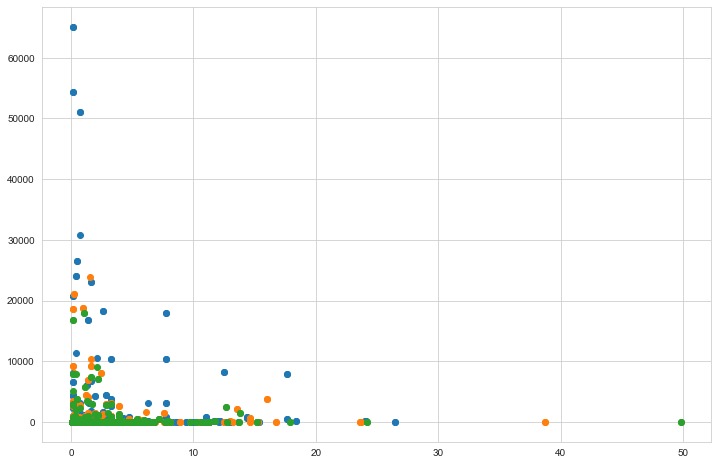

In [109]:
fig = plt.figure(figsize=(12,8),frameon=False)
sns.set_style("whitegrid")
plt.scatter(df.LS_Period_1_2,df.LS_SNR_1_2)
plt.scatter(df.LS_Period_2_2,df.LS_SNR_2_2)
plt.scatter(df.LS_Period_3_2,df.LS_SNR_3_2)

In [114]:
print(min(df.LS_SNR_1_2))
print(max(df.LS_SNR_1_2))

8.507539999999999
65115.590789999995


In [116]:
df[df.LS_SNR_1_2>1000].count()

KeplerID                    80
LS_Period_1_2               80
LS_Period_2_2               80
LS_Period_3_2               80
LS_Periodogram_Value_1_2    80
LS_Periodogram_Value_2_2    80
LS_Periodogram_Value_3_2    80
LS_SNR_1_2                  80
LS_SNR_2_2                  80
LS_SNR_3_2                  80
Log10_LS_Prob_1_2           80
Log10_LS_Prob_2_2           80
Log10_LS_Prob_3_2           80
Npoints_1                   80
RMS_1                       80
dtype: int64

In [118]:
df.KeplerID[df.LS_SNR_1_2>20000]

359     2437060
364     2437075
614     2437773
782     2438249
800     2438324
827     2438413
919     2568962
1296    2437060
1301    2437075
1551    2437773
1719    2438249
1737    2438324
1764    2438413
1856    2568962
1961    2569494
Name: KeplerID, dtype: object